In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn
import seaborn as sns


In [2]:
df = pd.read_csv('../data/train.csv')
df.head(3)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0


In [3]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [4]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [7]:
df.loc[5]

id                                  5
person_age                         27
person_income                   45000
person_home_ownership            RENT
person_emp_length                 2.0
loan_intent                   VENTURE
loan_grade                          A
loan_amnt                        9000
loan_int_rate                    8.94
loan_percent_income               0.2
cb_person_default_on_file           N
cb_person_cred_hist_length          5
loan_status                         0
Name: 5, dtype: object

In [8]:
df.person_age.max()

123

In [9]:
df.person_age.median()

26.0

In [10]:
df.person_age.value_counts()

person_age
23     7726
22     7051
24     6395
25     5067
27     4450
26     3874
28     3707
29     3270
30     2333
31     1917
21     1795
32     1565
33     1306
36     1117
34     1041
37      992
35      862
38      745
39      536
40      438
41      433
43      320
42      291
44      229
46      164
45      163
47      125
48       97
53       75
51       69
50       63
52       62
54       60
49       59
58       35
55       34
56       29
60       28
57       25
65       13
61       13
20       12
66       11
64       10
70       10
62        7
69        6
59        6
73        3
84        2
80        2
76        1
123       1
Name: count, dtype: int64

In [11]:
df.person_home_ownership.value_counts()

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64

In [12]:
#find outliers 

<Axes: xlabel='person_age', ylabel='person_home_ownership'>

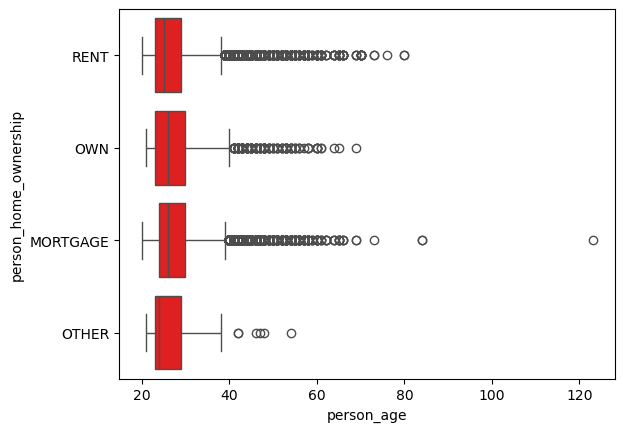

In [13]:
sns.boxplot(data=df,x=df['person_age'],y=df['person_home_ownership'],color='r')


In [14]:
'''This boxplot showcases the distribution of age when it comes to home ownership. We can see that across all categories the median age for individuals is between 20s and 30s, indicating most people in this dataset qualify as young adults. 
All the boxes of the boxplot are quite narrow implying that most people in each category are clustered around the same age. The outliers represent the much older population from the dataset. In conclusion there isnt a big difference between age groups when it comes to renting,owning, mortgaging or any other methods, all the groups seem to have similar central tendencies.'''

'This boxplot showcases the distribution of age when it comes to home ownership. We can see that across all categories the median age for individuals is between 20s and 30s, indicating most people in this dataset qualify as young adults. \nAll the boxes of the boxplot are quite narrow implying that most people in each category are clustered around the same age. The outliers represent the much older population from the dataset. In conclusion there isnt a big difference between age groups when it comes to renting,owning, mortgaging or any other methods, all the groups seem to have similar central tendencies.'

<Axes: xlabel='loan_amnt', ylabel='loan_intent'>

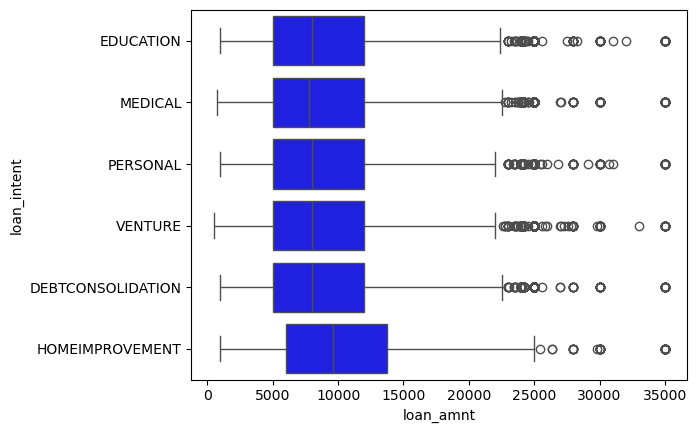

In [15]:
sns.boxplot(data=df, y= df['loan_intent'],x=df['loan_amnt'],color='b')

In [16]:
#Here we look at loan intent and loan amount. The median loan amount across all categories are mostly similar.Home Improvements have a slightly higher median than the others. Each category also includes outliers representing individuals who borrowed a higher amount than the median range. The IQR boxes are fairly simmilar among the different categories, not showing extreme variation in loan sizes. Overall loan amounts are relatively consistent around 10,000 to 15,000.

In [17]:
x = df.drop('loan_status',axis=1)
y= df.loan_status

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
x_train_cat = encoder.fit_transform(x_train.select_dtypes(include='object'))
x_test_cat = encoder.transform(x_test.select_dtypes(include='object'))


In [21]:
scaler = Normalizer()
x_train_num = scaler.fit_transform(x_train.select_dtypes(include=['float64','int64']))
x_test_num = scaler.transform(x_test.select_dtypes(include=['float64','int64']))


In [22]:
x_train = np.hstack([x_train_cat,x_train_num])
x_test = np.hstack([x_test_cat,x_test_num])

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier,'XGB Classifier': XGBClassifier(use_label_encoder=False,eval_metric = 'logloss')
from sklearn.neural_network import MLPClassifier

In [38]:
models = {'Logistic Regression': LogisticRegression(penalty='l2',solver='saga'),'Random Forest Classifier' : RandomForestClassifier(n_estimators=100),'Gradient Boosting Classifier': GradientBoostingClassifier(),'MLP Classifier': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2))}
for n,m in models.items():
    m.fit(x_train,y_train)
    y_pred = m.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
confusion = confusion_matrix(y_test,y_pred)
classification = classification_report(y_test,y_pred)
print('Accuracy:',accuracy,'\n','Precision', precision, '\n', 'Recall', recall, '\n', 'f1_score', f1, '\n', 'Confusion Matrix:',confusion ,'\n','Classification Report:', classification)

Accuracy: 0.934350754540029 
 Precision 0.8036211699164345 
 Recall 0.702801461632156 
 f1_score 0.7498375568551007 
 Confusion Matrix: [[9805  282]
 [ 488 1154]] 
 Classification Report:               precision    recall  f1-score   support

           0       0.95      0.97      0.96     10087
           1       0.80      0.70      0.75      1642

    accuracy                           0.93     11729
   macro avg       0.88      0.84      0.86     11729
weighted avg       0.93      0.93      0.93     11729



C:\Users\cathy\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [40]:
import os
from pathlib import Path

# 1️⃣ Create a proper .gitignore if it doesn't exist
gitignore_content = """
# --- Python cache / logs ---
__pycache__/
*.py[cod]
*.log
*.tmp
*.DS_Store

# --- Jupyter checkpoint folders ---
.ipynb_checkpoints/

# --- MLflow experiment tracking ---
mlruns/

# --- Virtual environments ---
venv/
.env/
.env*/

# --- Miscellaneous ---
*.sqlite
*.db
*.csv~
*.bak
*.swp
"""

with open(".gitignore", "w") as f:
    f.write(gitignore_content.strip() + "\n")

print("✅ .gitignore file created/updated.\n")

# 2️⃣ Remove unwanted files from git index if they were already tracked
os.system("git rm -r --cached mlruns .ipynb_checkpoints 2>nul")

# 3️⃣ Stage everything else cleanly
os.system("git add .")

# 4️⃣ Show what will be committed
print("📂 Files ready to commit:")
os.system("git status --short")


✅ .gitignore file created/updated.

📂 Files ready to commit:


0